In [1]:
import pickle
import numpy as np

In [2]:
with open('test_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
train_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [4]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [5]:
train_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [6]:
print(type(train_data))
print(type(test_data))

<class 'list'>
<class 'list'>


In [7]:
print("Length of the train data: ", len(train_data))
print("Length of the test data: ", len(test_data))

Length of the train data:  1000
Length of the test data:  1000


In [8]:
' '.join(train_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [9]:
' '.join(train_data[0][1])

'Is John in the kitchen ?'

In [10]:
train_data[0][2]

'no'

In [11]:
all_data = test_data + train_data

In [12]:
len(all_data)

2000

In [13]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [14]:
type(all_data)

list

In [15]:
set(train_data[0][0])

{'.', 'John', 'Mary', 'bedroom', 'got', 'milk', 'moved', 'the', 'there', 'to'}

In [16]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [17]:
vocab.add('no')

In [18]:
vocab.add('yes')

In [19]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [20]:
vocab_len = len(vocab) + 1

In [21]:
all_story_len = [len(data[0]) for data in all_data]
max_story_len = max(all_story_len)
max_question_len = max([len(data[1]) for data in all_data])

In [22]:
max_story_len


86

In [23]:
max_question_len

6

In [24]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [25]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [26]:
tokenizer.word_index

{'down': 1,
 'discarded': 2,
 'garden': 3,
 'office': 4,
 '?': 5,
 'hallway': 6,
 'bedroom': 7,
 'dropped': 8,
 'got': 9,
 'moved': 10,
 'daniel': 11,
 'travelled': 12,
 'put': 13,
 'john': 14,
 'back': 15,
 'no': 16,
 'up': 17,
 'grabbed': 18,
 'left': 19,
 'sandra': 20,
 'football': 21,
 'in': 22,
 'picked': 23,
 'yes': 24,
 '.': 25,
 'there': 26,
 'milk': 27,
 'apple': 28,
 'kitchen': 29,
 'went': 30,
 'journeyed': 31,
 'took': 32,
 'bathroom': 33,
 'to': 34,
 'is': 35,
 'the': 36,
 'mary': 37}

In [27]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [28]:
train_story_text[:2]

[['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'discarded',
  'the',
  'milk',
  '.',
  'John',
  'went',
  'to',
  'the',
  'garden',
  '.']]

In [29]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [30]:
print(len(train_story_seq))
print(len(train_story_text))

1000
1000


In [31]:
train_story_text[:2]

[['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'discarded',
  'the',
  'milk',
  '.',
  'John',
  'went',
  'to',
  'the',
  'garden',
  '.']]

In [32]:
train_story_seq[:2]

[[37, 9, 36, 27, 26, 25, 14, 10, 34, 36, 7, 25],
 [37,
  9,
  36,
  27,
  26,
  25,
  14,
  10,
  34,
  36,
  7,
  25,
  37,
  2,
  36,
  27,
  25,
  14,
  30,
  34,
  36,
  3,
  25]]

In [33]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    X = []
    Xq = []
    Y = []
    for story, query, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]

        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1

        X.append(x)   # X holds list of lists of word indices for stories.
        Xq.append(xq) # Xq holds list of lists for word indices for questions.
        Y.append(y) # Y holds lists of lists of (38) biniary numbers, only 1 of them is 1.

    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [34]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [35]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [36]:
inputs_test

array([[ 0,  0,  0, ..., 36,  7, 25],
       [ 0,  0,  0, ..., 36,  3, 25],
       [ 0,  0,  0, ..., 36,  3, 25],
       ...,
       [ 0,  0,  0, ..., 36, 28, 25],
       [ 0,  0,  0, ..., 36,  3, 25],
       [ 0,  0,  0, ..., 28, 26, 25]], dtype=int32)

In [37]:
queries_test

array([[35, 14, 22, 36, 29,  5],
       [35, 14, 22, 36, 29,  5],
       [35, 14, 22, 36,  3,  5],
       ...,
       [35, 37, 22, 36,  7,  5],
       [35, 20, 22, 36,  3,  5],
       [35, 37, 22, 36,  3,  5]], dtype=int32)

In [38]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [40]:
tokenizer.word_index['yes']

24

In [41]:
tokenizer.word_index['no']

16

In [42]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [43]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [44]:
vocab_size = len(vocab) + 1

In [45]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [46]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))


In [47]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))


In [48]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)


In [49]:
print(input_encoded_m.shape)
print(question_encoded.shape)

(None, 86, 64)
(None, 6, 64)


In [50]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)


In [51]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [52]:
answer = concatenate([response, question_encoded])

In [53]:
answer

<KerasTensor: shape=(None, 6, 150) dtype=float32 (created by layer 'concatenate')>

In [54]:
answer = LSTM(32)(answer)

In [55]:
print(answer.shape)

(None, 32)


In [56]:
answer = Dropout(0.5)(answer)

In [57]:
answer = Dense(vocab_size)(answer)

In [58]:
answer = Activation('softmax')(answer)


In [59]:
answer

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'activation_1')>

In [60]:
model = Model([input_sequence, question], answer)

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 86)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [64]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=15, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/15
32/32 [==============================] - 1s 16ms/step - loss: 0.6786 - accuracy: 0.5750 - val_loss: 0.6662 - val_accuracy: 0.6250
Epoch 2/15
32/32 [==============================] - 0s 14ms/step - loss: 0.6783 - accuracy: 0.5570 - val_loss: 0.6668 - val_accuracy: 0.6010
Epoch 3/15
32/32 [==============================] - 0s 14ms/step - loss: 0.6775 - accuracy: 0.5850 - val_loss: 0.6654 - val_accuracy: 0.6190
Epoch 4/15
32/32 [==============================] - 0s 13ms/step - loss: 0.6748 - accuracy: 0.5670 - val_loss: 0.6628 - val_accuracy: 0.6290
Epoch 5/15
32/32 [==============================] - 0s 14ms/step - loss: 0.6738 - accuracy: 0.5710 - val_loss: 0.6598 - val_accuracy: 0.6360
Epoch 6/15
32/32 [==============================] - 0s 13ms/step - loss: 0.6778 - accuracy: 0.5530 - val_loss: 0.6605 - val_accuracy: 0.6390
Epoch 7/15
32/32 [==============================] - 0s 13ms/step - loss: 0.6699 - accuracy: 0.5830 - val_loss: 0.6629 - val_accuracy: 0.6070
Epoch 8/15
32

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epoch')

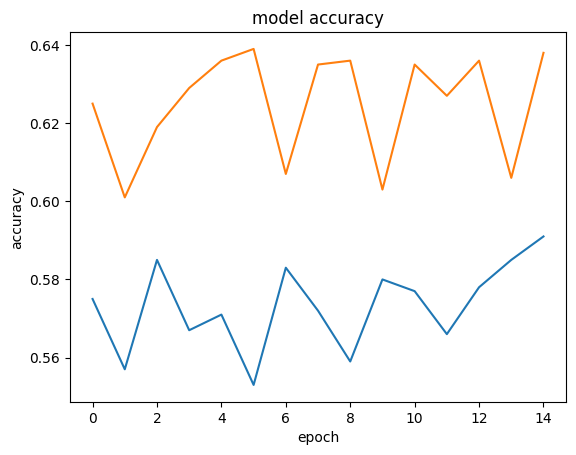

In [66]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


In [67]:
model.save("chatbot_model")

In [68]:
model.load_weights("chatbot_model")

In [69]:
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 3ms/step


In [70]:
pred_results.shape

(1000, 38)

In [71]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [72]:
story = ' '.join(word for word in test_data[0][0])
story

'Mary got the milk there . John moved to the bedroom .'

In [73]:
query = ' '.join(word for word in test_data[0][1])

In [74]:
query

'Is John in the kitchen ?'

In [75]:
test_data[0][2]

'no'

In [77]:
val_max = np.argmax(pred_results[0])


for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("predicted ans is",k)
print("probability of certainity",pred_results[0][val_max])

predicted ans is no
probability of certainity 0.54654175


In [78]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [79]:
story = "mary dropped the football . Sandra discarded apple in kitchen"
story.split()

['mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [80]:
my_question = "Is sandra in the kitchen ?"

In [81]:
my_question.split()

['Is', 'sandra', 'in', 'the', 'kitchen', '?']

In [82]:
mydata = [(story.split(), my_question.split(), 'yes')]

In [83]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [84]:
pred_results = model.predict((my_story, my_ques))

1/1 [==============================] - 0s 50ms/step


In [86]:
val_max = np.argmax(pred_results[0])


for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("predicted ans is",k)
print("probability of certainity",pred_results[0][val_max])

predicted ans is yes
probability of certainity 0.5499666


In [88]:
pred_results[0][val_max]


0.5499666